## Exercise 8 - K-means clustering

- Use voice.csv file for this exercise set
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset
- **The goal of this exercise is to distinguish male and female voices from the given data**

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

data = pd.read_csv("data_files/voice.csv", delimiter=",")

data_filtered = data[["meanfun","minfun"]]

data_filtered


,meanfun,minfun
0,0.084279,0.015702
1,0.107937,0.015826
2,0.098706,0.015656
3,0.088965,0.017798
4,0.106398,0.016931
...,...,...
3163,0.182790,0.083770
3164,0.188980,0.034409
3165,0.209918,0.039506
3166,0.172375,0.034483


2 Run the predictions for the data so that it will be categorised for male and female data.

In [51]:
X = data_filtered.values

print(X)

categories = data["label"]

kmeans = KMeans(n_clusters=2, init = 'random', max_iter = 100, random_state=42)
y_kmeans = kmeans.fit_predict(X)

y_kmeans


[[0.08427911 0.01570167]
 [0.10793655 0.01582591]
 [0.09870626 0.01565558]
 ...
 [0.20991768 0.03950617]
 [0.172375   0.03448276]
 [0.18560693 0.06225681]]


array([1, 1, 1, ..., 0, 0, 0])

3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

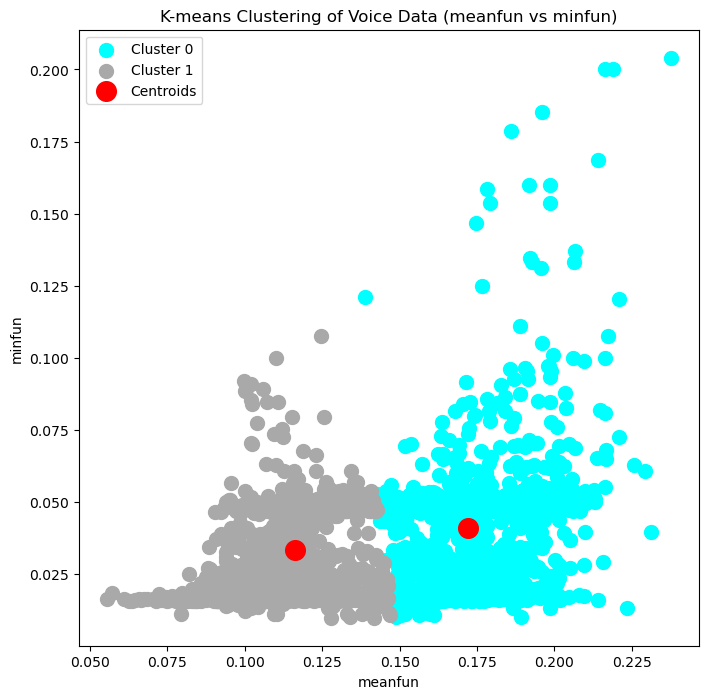

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='cyan', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='darkgray', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.xlabel("meanfun")
plt.ylabel("minfun")
plt.title("K-means Clustering of Voice Data (meanfun vs minfun)")
plt.legend()
plt.show()

4 Validate K-means clustering prediction results using confusion matrix.

pred_cluster  true_label
0             female        1456
              male            51
1             male          1533
              female         128
Name: count, dtype: int64
[[1533   51]
 [ 128 1456]]


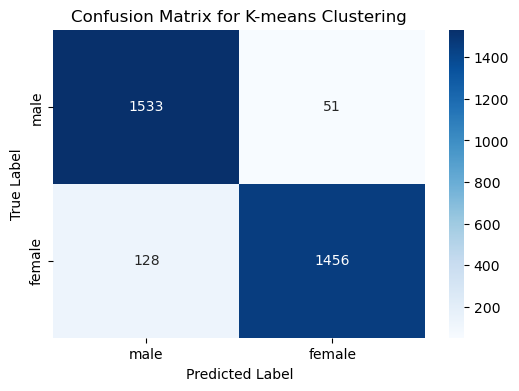

In [53]:
df_eval = pd.DataFrame({"pred_cluster": y_kmeans, "true_label": data["label"]})
print(df_eval.groupby("pred_cluster")["true_label"].value_counts())

mapping = {0: "female", 1: "male"}
predicted_gender = df_eval["pred_cluster"].map(mapping)

cm = metrics.confusion_matrix(df_eval["true_label"], predicted_gender, labels=["male", "female"])
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["male", "female"], yticklabels=["male", "female"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for K-means Clustering")
plt.show()